___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col="Unnamed: 0")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


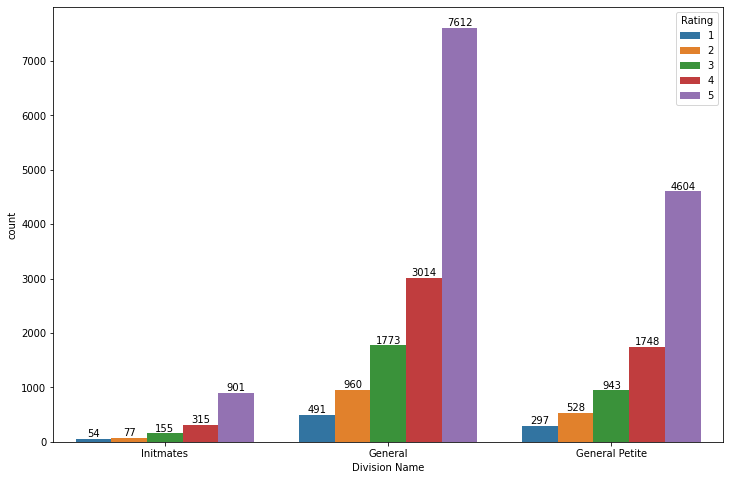

In [3]:
ax = sns.countplot(data = df, x ="Division Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)

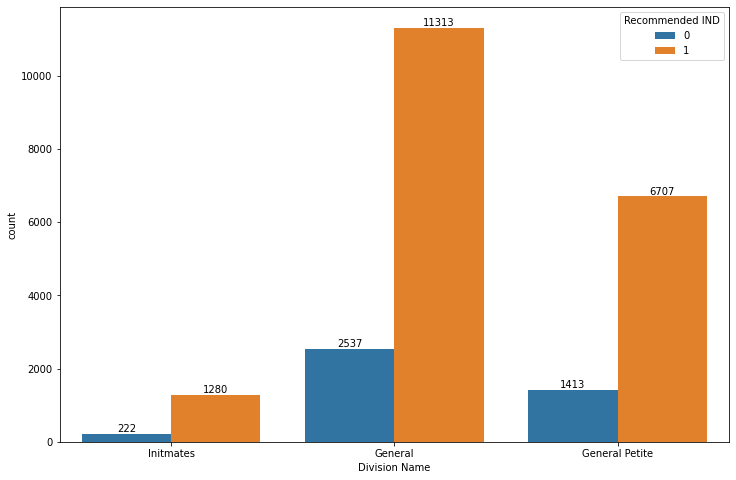

In [4]:
ax = sns.countplot(data = df, x ="Division Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

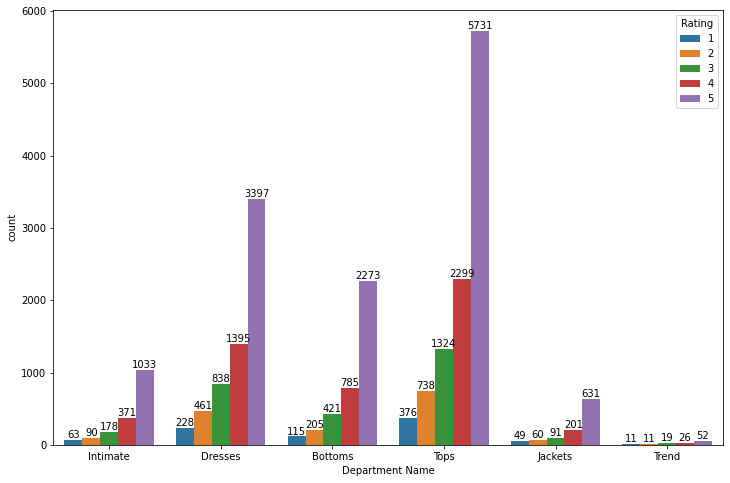

In [5]:
ax = sns.countplot(data = df, x ="Department Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)

### Data Wrangling

In [6]:
df["Review Text"].sample(19)

20763    Comfort is very important to me. as someone wh...
10348    Gorgeous colors, high quality. my only word of...
18556    This sweet dress is perfect for fall and sprin...
16083    Adorable suit, super cute print and great qual...
4147     I bought this tunic today because it paired we...
18117    I loved this shirt and attempted to buy it - h...
21799    These are cool jeans to have in a mound of typ...
960      I tried these on as a return at my store and s...
7008     White and silver threads made fabric look grey...
3066     I couldn't agree more with that first review. ...
18801    Purchased these in the blue motif. love the he...
21046    Beautiful dress but the fit was off for me. ov...
7567     I got the taupe and loved it so much i ordered...
6757     The most disappointing thing about buying flar...
13719    Very flattering dress but i think the black is...
1734     Lovely embroidery with a classic look, great a...
19220    I wore this top right out of the package i lov.

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [7]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [9]:
df2 =df[["Recommended IND", "Review Text"]]

In [10]:
df2.head()

,Recommended IND,Review Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...


In [11]:
df2.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

---
---


### Missing Value Detection

In [12]:
df2.isnull().sum()/df2.shape[0]*100

label    0.000000
text     3.597888
dtype: float64

In [13]:
df2["Review Text"].isna().value_counts()

KeyError: 'Review Text'

In [ ]:
df2.loc[pd.isna(df2["Review Text"]), :].index

In [ ]:
x = df2.loc[pd.isna(df2["Review Text"]), :].index

In [ ]:
df.iloc[92]

In [ ]:
df.iloc[93]

In [ ]:
df2.shape


In [ ]:
df2.drop(x, inplace=True)

In [ ]:
df2.shape


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [ ]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
stop_words = stopwords.words('english')


### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
X = df2["Review Text"]
y= df2["Recommended IND"]

In [ ]:
X

In [ ]:
y

In [ ]:
df2.isna().any()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [ ]:
df2

### Detect Reviews (positive and negative separately)

In [ ]:
positive_sentences = df2[df2["label"] == 1]["text"]
positive_sentences

In [ ]:
negative_sentences = df2[df2["label"] == 0]["text"]
negative_sentences

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

In [ ]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [ ]:
wordcloud_positive.generate(positive_words)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2["text"]
y= df2["label"]

In [ ]:
y = y.map({0:1, 1:0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
log_AP_count = viz.score_

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
log_AP_tfidf = viz.score_

## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score_

### TF-IDF

In [ ]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
svc_AP_count = viz.score_

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
rf_AP_count = viz.score_

### TF-IDF

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_

## Ada Boosting

### Countvectorizer

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# ada.fit(X_train_count, y_train)

In [ ]:
# print("Ada MODEL")
# eval(ada, X_train_count, X_test_count)

In [ ]:
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, pos_label=0),
#                  'recall-0': make_scorer(recall_score, pos_label=0),
#                  'f1-0': make_scorer(f1_score, pos_label=0),
#                  'precision-1': make_scorer(precision_score, pos_label=1),
#                  'recall-1': make_scorer(recall_score, pos_label=1),
#                  'f1-1': make_scorer(f1_score, pos_label=1)
#                  }

# for i, j in custom_scorer.items():
#     model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
#     scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
#     if i == "recall-1":
#         ada_count_rec = scores
#     elif i == "f1-1":
#         ada_count_f1 = scores
#     print(f" {i:20} score for count : {scores}\n")

In [ ]:
# viz = PrecisionRecallCurve(
#     AdaBoostClassifier(n_estimators= 500, random_state = 42),
#     classes=ada.classes_,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train_count,y_train)
# viz.score(X_test_count, y_test)
# viz.show();

In [ ]:
# ada_AP_count = viz.score_

### TF-IDF

In [ ]:
# ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# ada.fit(X_train_tf_idf, y_train)

In [ ]:
# print("Ada MODEL")
# eval(ada, X_train_tf_idf, X_test_tf_idf)

In [ ]:
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, pos_label=0),
#                  'recall-0': make_scorer(recall_score, pos_label=0),
#                  'f1-0': make_scorer(f1_score, pos_label=0),
#                  'precision-1': make_scorer(precision_score, pos_label=1),
#                  'recall-1': make_scorer(recall_score, pos_label=1),
#                  'f1-1': make_scorer(f1_score, pos_label=1)
#                  }

# for i, j in custom_scorer.items():
#     model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
#     scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     if i == "recall-1":
#         ada_tfidf_rec = scores
#     elif i == "f1-1":
#         ada_tfidf_f1 = scores
#     print(f" {i:20} score for tfidf : {scores}\n")

In [ ]:
# viz = PrecisionRecallCurve(
#     AdaBoostClassifier(n_estimators= 500, random_state = 42),
#     classes=ada.classes_,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train_tf_idf,y_train)
# viz.score(X_test_tf_idf, y_test)
# viz.show();

In [109]:
# ada_AP_tfidf = viz.score_

## DL modeling

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [119]:
df2

,label,text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...
...,...,...
23481,1,I was very happy to snag this dress at such a ...
23482,1,"It reminds me of maternity clothes. soft, stre..."
23483,0,"This fit well, but the top was very see throug..."
23484,1,I bought this dress for a wedding i have this ...


### Tokenization

In [122]:
X = df2['text'].values
y = df2['label'].map({0:1, 1:0}).values

In [123]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [126]:
tokenizer.fit_on_texts(X)

### Creating word index

In [127]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [128]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [129]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [130]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [131]:
print(X_num_tokens[100])

[1, 45, 267, 489, 3, 2, 124, 221, 5, 8, 29, 4, 58, 25, 12, 330, 2, 38, 141, 4, 97, 9, 1, 451, 3, 17, 1506, 27, 920, 691, 927]


In [132]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

<IPython.core.display.Javascript object>

### Maximum number of tokens for all documents¶

In [133]:
num_tokens.mean()

60.60699615741354

In [134]:
num_tokens.max()

116

In [135]:
num_tokens.argmax()

16263

In [136]:
X[15417]

'So cute and comfy. great fit. i bought them in green and they look great with wedges, sneakers or sandals. dress up or down. pair with a t-shirt and cotton blazer--adorable!'

In [137]:
max_tokens = 106

In [138]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9840554745815114

### Fixing token counts of all documents (pad_sequences)

In [139]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [140]:
X_pad.shape

(22641, 106)

### Train Set Split

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
from keras.layers import Bidirectional

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [144]:
model = Sequential()

In [145]:
embedding_size = 100

In [146]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [147]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [148]:
optimizer = Adam(lr=0.004)

In [149]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [150]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 106, 100)         1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 96)          43200     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 96)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 106, 96)          42048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 106, 96)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96)               4

In [151]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [152]:
pd.Series(y_train).value_counts(normalize=True)

0    0.818856
1    0.181144
dtype: float64

In [153]:
weights = {0:19, 1:81}

In [154]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
160/160 [==============================] - 139s 815ms/step - loss: 13.1684 - recall: 0.8120 - val_loss: 0.5303 - val_recall: 0.9561
Epoch 2/25
160/160 [==============================] - 113s 705ms/step - loss: 7.9206 - recall: 0.9222 - val_loss: 0.3411 - val_recall: 0.9049
Epoch 3/25
160/160 [==============================] - 112s 700ms/step - loss: 5.2972 - recall: 0.9623 - val_loss: 0.3872 - val_recall: 0.8854
Epoch 4/25
160/160 [==============================] - 111s 692ms/step - loss: 4.2394 - recall: 0.9661 - val_loss: 0.3543 - val_recall: 0.8732
Epoch 5/25
160/160 [==============================] - 113s 704ms/step - loss: 3.1758 - recall: 0.9783 - val_loss: 0.3912 - val_recall: 0.8585
Epoch 5: early stopping


In [155]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,13.168390,0.811975,0.530346,0.956098
1,7.920603,0.922243,0.341084,0.904878
2,5.297230,0.962341,0.387215,0.885366
3,4.239363,0.966134,0.354294,0.873171
4,3.175832,0.978326,0.391196,0.858537


<AxesSubplot:>

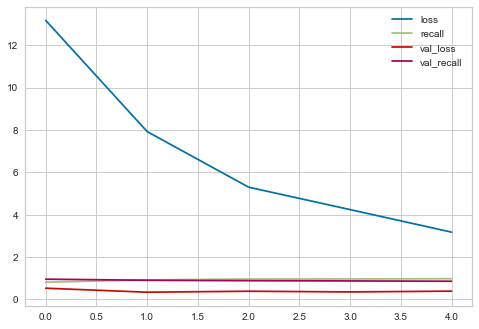

In [156]:
model_loss.plot()

In [157]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 21s 34ms/step - loss: 0.2302 - recall: 0.9886


[0.23019284009933472, 0.9886209964752197]

In [158]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 34ms/step - loss: 0.3411 - recall: 0.9049


[0.34108367562294006, 0.9048780202865601]

In [159]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 24s 35ms/step
[[14789  1896]
 [   42  3649]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     16685
           1       0.66      0.99      0.79      3691

    accuracy                           0.90     20376
   macro avg       0.83      0.94      0.86     20376
weighted avg       0.94      0.90      0.91     20376



In [160]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 38ms/step
[[1560  295]
 [  39  371]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1855
           1       0.56      0.90      0.69       410

    accuracy                           0.85      2265
   macro avg       0.77      0.87      0.80      2265
weighted avg       0.90      0.85      0.86      2265



In [161]:
from sklearn.metrics import precision_recall_curve, average_precision_score

71/71 [==============================] - 3s 36ms/step


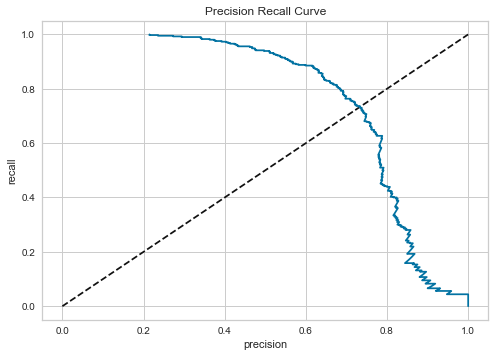

In [162]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [163]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [164]:
!pip install transformers


     ---------------------------------------- 4.4/4.4 MB 11.8 MB/s eta 0:00:00
     -------------------------------------- 101.5/101.5 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 11.0 MB/s eta 0:00:00


### Tokenization

In [165]:
import numpy as np
import pandas as pd

In [166]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Max sentence length:  162


In [167]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [168]:
Xids, Xmask = transformation(X)

In [169]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

### Transformation text to tensor

In [170]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [171]:
batch_size = 16
length = len(X)
# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(length, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [172]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### AdamW optimization

### Creating Model

In [173]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [177]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

KeyError: 'COLAB_TPU_ADDR'

In [178]:
strategy = tf.distribute.TPUStrategy(resolver)

NameError: name 'resolver' is not defined

In [179]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

NameError: name 'strategy' is not defined

In [ ]:
model3.summary()

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1)

### Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

### BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) #3e-5, 2e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Precision()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

In [ ]:
pd.Series(y).value_counts(normalize=True)

In [ ]:
weights = {0:0.2, 1:0.8}

In [ ]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1, class_weight=weights)

In [ ]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})

def labels(ax):
                        
     for p in ax.patches:
        ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___